<a href="https://colab.research.google.com/github/alison-dlee/DTSA-5301-Final-Project/blob/main/5509_Project_Age_of_Birthing_Mothers_South_Korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
from scipy.stats import linregress

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

**DTSA-5509 Final Project**

This project is to explore important changes in the age of birthing mothers over the years of 1993 - 2023. I hope to analyze through EDA:


*   How has maternal age changed over the years?
*   How has maternal age change between 1st, 2nd, and 3rd child(ren)?
*   Does province (location within South Korea) affect maternal age?

Using supervised machine learning, I hope to:


*   Predict maternal age in the upcoming years using linear regression, decision tree, or random forests
*   Predict whether a mother will have a second and/or third child based on the maternal age of the first child, using support vector machines

**Goal:**

This project is important to me because I am a woman from South Korea, and I happen to be in the age group commonly associated with maternal age. I hope to find interesting trends and predict what the future of maternal age is like, using machine learning. I understand that the models I will be using to predict the future of maternal age cannot be extrapolated fully, since the true reasoning behind the (potential) change in maternal age has many facets behind why it happens, including social, economical, and scientific reasons.

**Source:**

***APA citation:***

Statistics of Korea. (2024, August 28). Mean age of Mother by Birth Order for  Provinces [Review of Mean age of Mother by Birth Order for Provinces]. KOSIS; Statistics Korea. https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Flist_id%3DA21%26obj_var_id%3D%26seqNo%3D%26tblId%3DDT_1B81A20%26vw_cd%3DMT_ETITLE%26language%3Den%26orgId%3D101%26path%3D%252Feng%252Fsearch%252FsearchList.do%26conn_path%3DA6%26itm_id%3D%26scrId%3D%26

‌

I got this dataset from the "Korean Statistical Information Service, " which is a govenment-run statistics and data website that is updated frequently.

**Data Description:**

* Spans from years 1993 - 2023

* 5 rows, 187 columns, totals 935 cells

Features are:

* "By province" - categorical - location of where this data has been taken

* "Average Age-specific fertility year xxxx" - numerical - years span from 1993-2023, and the data is in years of maternal age

* "1st child year xxxx" - numerical - years span from 1993-2023, and the data is in years of maternal age

* "2nd child year xxxx" - numerical - years span from 1993-2023, and the data is in years of maternal age

* "3rd child year xxxx" - numerical - years span from 1993-2023, and the data is in years of maternal age

* "3st child and over xxxx" - numerical - years span from 1993-2023, and the data is in years of maternal age - this is a feature I am not going to use, and therefore will be removing from the dataset

* "4st child year xxxx" - numerical - years span from 1993-2023, and the data is in years of maternal age








In [2]:
# import dataset as is. cleaning to follow

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/Mean_age_of_Mother_by_Birth_Order_for_Provinces_20241121102503.csv')
df.head()

Saving Mean_age_of_Mother_by_Birth_Order_for_Provinces_20241121102503.csv to Mean_age_of_Mother_by_Birth_Order_for_Provinces_20241121102503.csv


,By province,1993,1993.1,1993.2,1993.3,1993.4,1993.5,1994,1994.1,1994.2,...,2022.2,2022.3,2022.4,2022.5,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,By province,Average Age-specific fertility,1st child,2st child,3st child and over,3st child,4st child and over,Average Age-specific fertility,1st child,2st child,...,2st child,3st child and over,3st child,4st child and over,Average Age-specific fertility,1st child,2st child,3st child and over,3st child,4st child and over
1,Whole country,27.55,26.23,28.49,31.59,31.19,33.89,27.78,26.4,28.65,...,34.22,35.62,35.49,36.3,33.64,32.96,34.4,35.75,35.6,36.47
2,Seoul,27.99,26.8,29.12,32.33,32.04,34.89,28.21,26.98,29.27,...,35.29,36.55,36.44,37.37,34.57,34.03,35.5,36.74,36.63,37.53
3,Busan,27.7,26.39,28.75,32.12,31.75,35.02,27.9,26.52,28.86,...,34.59,35.94,35.87,36.4,33.81,33.1,34.82,36.01,35.87,36.82
4,Daegu,27.58,26.16,28.67,32.12,31.73,35.61,27.79,26.31,28.79,...,34.12,35.89,35.67,37.08,33.54,32.85,34.29,35.83,35.66,36.7


### DATASET CLEANING ###
* column names were revised to be more intuitive to the reader
  * For example, all column names originally were the same "average age-specific fertility, 1st child, 2st child, 3st child and oer, 3st child, and 4st child and over."  These were reamed to "xxxx_average_age_specific_fertility," "xxxx_firstchild," and so forth, with "xxxx" being year
* The original first column was dropped because it did not contain pertinent information
* The index was revised to "by province" to provide clear distinctions
* All data types except for the index were changed from objects to floats
* Checked the dataset for missing values (none found)

### DATASET CLEANING SUMMARY ###
Dataset was already fairly clean, but needed a little bit of work to make it usable for my study. The major changes that I did mostly was for my own usability of this dataset, such as column name changes.

The only required cleaning I had to do was to make sure that the numerical values of the dataset were floats, so that I could perform math on them.

In [3]:
# change the name of the columns to make sense. prev .1, .2, ...
# function to rename columns based on the given rules

def rename_columns(column_name):
    if column_name == "By province":
        return column_name
    elif '.' not in column_name:
        return f"{column_name}_aasf"
    else:
        year, suffix = column_name.split('.')
        suffix_mapping = {
            '1': 'firstchild',
            '2': 'secondchild',
            '3': 'thirdchild',
            '4': 'third+child',
            '5': 'fourth+child'
        }
        return f"{year}_{suffix_mapping.get(suffix, 'unknown')}"

# apply the renaming function to the column names
df.columns = [rename_columns(col) for col in df.columns]
print(df.columns.tolist())

['By province', '1993_aasf', '1993_firstchild', '1993_secondchild', '1993_thirdchild', '1993_third+child', '1993_fourth+child', '1994_aasf', '1994_firstchild', '1994_secondchild', '1994_thirdchild', '1994_third+child', '1994_fourth+child', '1995_aasf', '1995_firstchild', '1995_secondchild', '1995_thirdchild', '1995_third+child', '1995_fourth+child', '1996_aasf', '1996_firstchild', '1996_secondchild', '1996_thirdchild', '1996_third+child', '1996_fourth+child', '1997_aasf', '1997_firstchild', '1997_secondchild', '1997_thirdchild', '1997_third+child', '1997_fourth+child', '1998_aasf', '1998_firstchild', '1998_secondchild', '1998_thirdchild', '1998_third+child', '1998_fourth+child', '1999_aasf', '1999_firstchild', '1999_secondchild', '1999_thirdchild', '1999_third+child', '1999_fourth+child', '2000_aasf', '2000_firstchild', '2000_secondchild', '2000_thirdchild', '2000_third+child', '2000_fourth+child', '2001_aasf', '2001_firstchild', '2001_secondchild', '2001_thirdchild', '2001_third+child

In [4]:
# Dropping the first column because it contains the descriptions of each column and it's unnecessary
df = df.iloc[1:].reset_index(drop=True)

#set index to the "by province" column name
df = df.set_index("By province")

In [5]:
# Change the type of all columns to float
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if appropriate)
df = df.dropna()
df.head()

1993_aasf            2
1993_firstchild      2
1993_secondchild     2
1993_thirdchild      2
1993_third+child     2
                    ..
2023_firstchild      0
2023_secondchild     0
2023_thirdchild      0
2023_third+child     0
2023_fourth+child    0
Length: 186, dtype: int64


,1993_aasf,1993_firstchild,1993_secondchild,1993_thirdchild,1993_third+child,1993_fourth+child,1994_aasf,1994_firstchild,1994_secondchild,1994_thirdchild,...,2022_secondchild,2022_thirdchild,2022_third+child,2022_fourth+child,2023_aasf,2023_firstchild,2023_secondchild,2023_thirdchild,2023_third+child,2023_fourth+child
By province,,,,,,,,,,,,,,,,,,,,,
Whole country,27.55,26.23,28.49,31.59,31.19,33.89,27.78,26.40,28.65,31.75,...,34.22,35.62,35.49,36.30,33.64,32.96,34.40,35.75,35.60,36.47
Seoul,27.99,26.80,29.12,32.33,32.04,34.89,28.21,26.98,29.27,32.43,...,35.29,36.55,36.44,37.37,34.57,34.03,35.50,36.74,36.63,37.53
Busan,27.70,26.39,28.75,32.12,31.75,35.02,27.90,26.52,28.86,32.29,...,34.59,35.94,35.87,36.40,33.81,33.10,34.82,36.01,35.87,36.82
Daegu,27.58,26.16,28.67,32.12,31.73,35.61,27.79,26.31,28.79,32.34,...,34.12,35.89,35.67,37.08,33.54,32.85,34.29,35.83,35.66,36.70
Incheon,27.48,26.22,28.47,31.34,31.05,33.82,27.76,26.44,28.66,31.74,...,34.13,35.74,35.70,35.95,33.58,32.87,34.36,35.60,35.41,36.45


# Exploratory Data Analysis #


### Focus on the maternal age of the First child
* Filter to columns ending with '_firstchild' to find out how the age of maternal age for only the first child changes over time.
* Use different colors to represent each province, but the focus is not on provinces at this point in the EDA

### Decide which model to fit in order to predict future data
* Correlation analysis to see if the data seems linear or nonlinear



In [7]:
# filter columns ending with '_firstchild'
firstchild_columns = [col for col in df.columns if col.endswith('_firstchild')]
firstchild_df = df[firstchild_columns]
firstchild_df.head()

,1993_firstchild,1994_firstchild,1995_firstchild,1996_firstchild,1997_firstchild,1998_firstchild,1999_firstchild,2000_firstchild,2001_firstchild,2002_firstchild,...,2014_firstchild,2015_firstchild,2016_firstchild,2017_firstchild,2018_firstchild,2019_firstchild,2020_firstchild,2021_firstchild,2022_firstchild,2023_firstchild
By province,,,,,,,,,,,,,,,,,,,,,
Whole country,26.23,26.40,26.49,26.65,26.89,27.14,27.39,27.69,27.99,28.29,...,30.97,31.20,31.37,31.62,31.85,32.09,32.25,32.57,32.84,32.96
Seoul,26.80,26.98,27.07,27.23,27.47,27.75,28.01,28.36,28.65,29.02,...,31.81,32.00,32.25,32.55,32.77,33.09,33.26,33.55,33.81,34.03
Busan,26.39,26.52,26.65,26.86,27.13,27.36,27.61,27.88,28.23,28.51,...,31.25,31.46,31.68,31.91,32.17,32.31,32.43,32.76,33.03,33.10
Daegu,26.16,26.31,26.43,26.65,26.90,27.15,27.37,27.65,27.95,28.29,...,31.03,31.33,31.41,31.54,31.74,31.89,32.00,32.39,32.65,32.85
Incheon,26.22,26.44,26.47,26.63,26.87,27.16,27.39,27.70,28.00,28.23,...,30.84,31.04,31.16,31.44,31.79,32.03,32.14,32.45,32.75,32.87


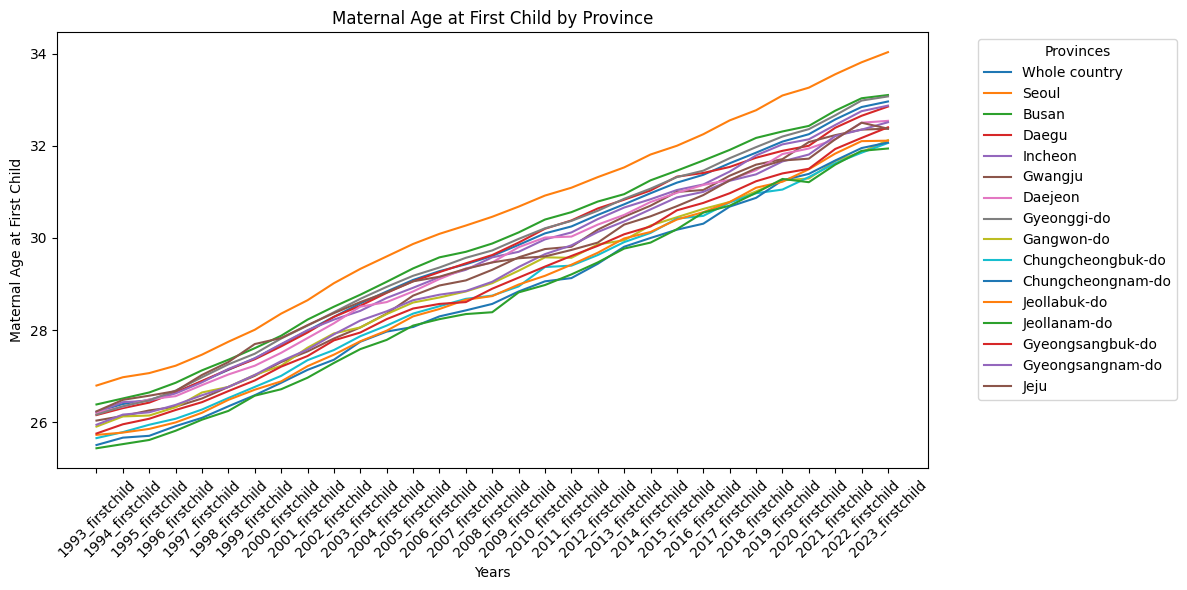

In [8]:
# transposing the df to make columns the x-axis to make it easier to plot
transposed_df = firstchild_df.T

# plot each row as a separate line
plt.figure(figsize=(12, 6))
for row in transposed_df.columns:
    plt.plot(transposed_df.index, transposed_df[row], label=row)

plt.xlabel("Years")
plt.ylabel("Maternal Age at First Child")
plt.title("Maternal Age at First Child by Province")
plt.legend(title="Provinces", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Major trend ##
At this point I can clearly see that the trend is consistently linear from 1993 to 2023

## Questions that arise: ##
* Why is there one line that it clearly above the other?
  - Seoul is a the capital of SK. Population of large cities tend to be very career driven, and career driven societies tend to have children later in life
* At what rate of maternal age are we rising per year?
  - Can this rate be extrapolated with machine learning to predict what the age will be in 2025? in 2026? 2050?
  - At what year will this prediction be "too extrapolated" meaning, it does not make sense in terms of physiological & medical sense?
* Are the years correlated to each other, and how does this affect the type of model we use to predict future data?

In [45]:
# What is the rate at which maternal age is increasing per year?

# calculate the difference between consecutive years for each province
yearly_increase = firstchild_df.diff(axis=1)

# calculate the average increase per year for each province
average_increase_per_year = yearly_increase.mean(axis=1)

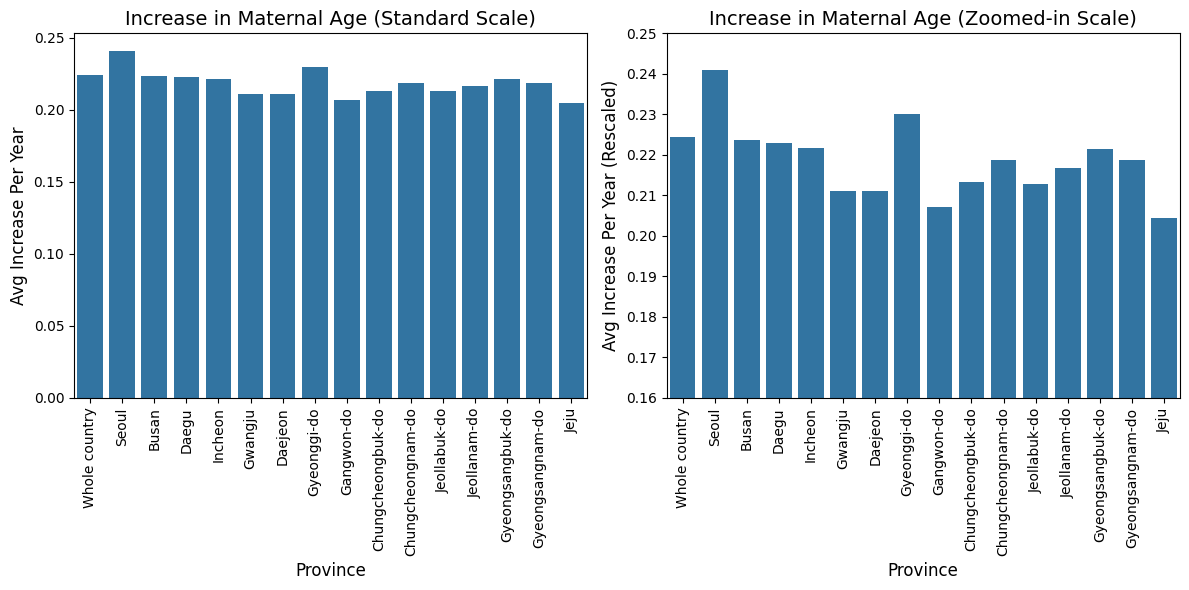

In [33]:
average_increase_per_year = average_increase_per_year.reset_index()
average_increase_per_year

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the first subplot (left)
sns.barplot(x=average_increase_per_year.iloc[:, 0],
            y=average_increase_per_year.iloc[:, 1],
            ax=axes[0])

# Left plot
axes[0].set_xlabel("Province", fontsize=12)
axes[0].set_ylabel("Avg Increase Per Year", fontsize=12)
axes[0].set_title("Increase in Maternal Age (Standard Scale)", fontsize=14)
axes[0].tick_params(axis="x", rotation=90)

# Right plot zoomed in
sns.barplot(x=average_increase_per_year.iloc[:, 0],
            y=average_increase_per_year.iloc[:, 1],
            ax=axes[1])

axes[1].set_xlabel("Province", fontsize=12)
axes[1].set_ylabel("Avg Increase Per Year (Rescaled)", fontsize=12)
axes[1].set_title("Increase in Maternal Age (Zoomed-in Scale)", fontsize=14)
axes[1].tick_params(axis="x", rotation=90)
axes[1].set_ylim(0.16, 0.25)  # Adjust scale

# Adjust layout
plt.tight_layout()
plt.show()

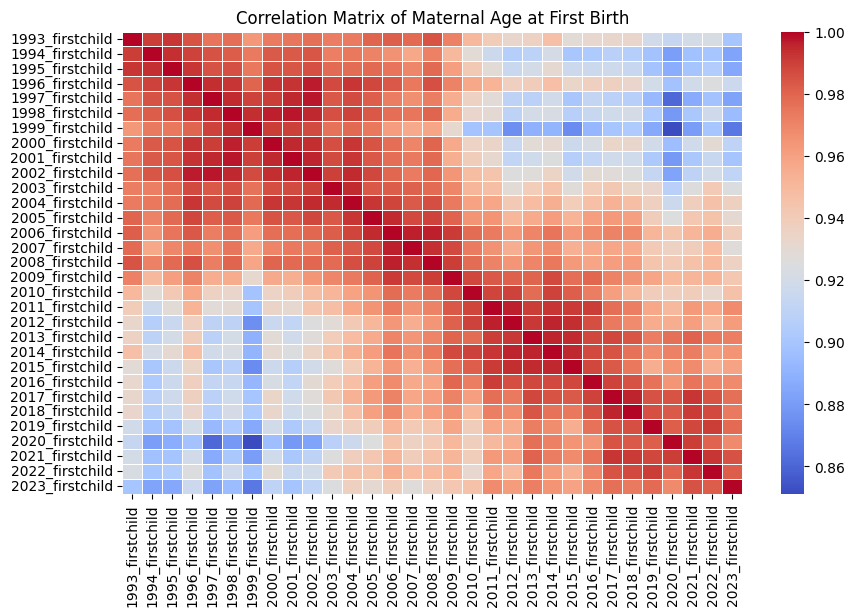

In [34]:
# Are years related to each other on what the maternal age is?

# correlation matrix
corr_matrix = firstchild_df.corr()

# plot the correlatin heatmap in coolwarm
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Maternal Age at First Birth")
plt.show()


### Results and Analysis of the Correlation Matrix
The correlation matrix shows the relationship between the maternal age at first birth across the years

Years close to each other (e.g., 2000 vs. 2001, 2015 vs. 2016, etc.) show high correlation, which suggests that maternal age at first birth increases consistently without sudden changes.

For example, the trend in 2005 is strongly correlated with 2006, 2007, and 2008, but not with 2022, 2023, which is almost 20 years later.

This is a good sign for linear regression as the choice for modeling, since past values are good predictors for future values.

I can also utilize random forests for weaker correlations between older and newer years might suggest that certain non-linear changes, such as government policies or cultural shifts) that may have had an impact


MAE: 0.04612084914861926
MSE: 0.0032345274774340693


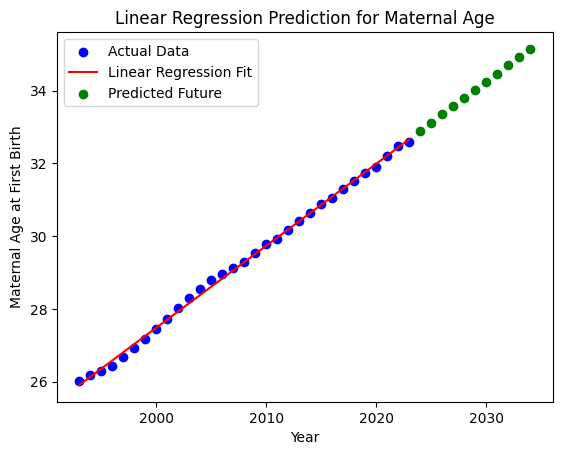

In [41]:
# Linear regression Modeling

# reshaping data to a format suitable for regression
years = np.array([int(col.split('_')[0]) for col in firstchild_df.columns]).reshape(-1, 1)
maternal_age = firstchild_df.mean().values.reshape(-1, 1)  # Average maternal age across provinces

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(years, maternal_age, test_size=0.2, random_state=42)

# training linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# predicting for test set and 10 future years past the dataset
y_pred = lr_model.predict(X_test)
future_years = np.array(range(2024, 2035)).reshape(-1, 1)
future_preds_lr = lr_model.predict(future_years)

# evaluating the models
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# plot
plt.scatter(years, maternal_age, label="Actual Data", color="blue")
plt.plot(years, lr_model.predict(years), label="Linear Regression Fit", color="red")
plt.scatter(future_years, future_preds, label="Predicted Future", color="green")
plt.xlabel("Year")
plt.ylabel("Maternal Age at First Birth")
plt.legend()
plt.title("Linear Regression Prediction for Maternal Age")
plt.show()


### Results and Analysis of Linear Regression Model
My linear regression model yielded a very low score for MAE (mean absolute), which indicates a very low error, and a highly fitting model. The MSE (mean squared error) is also low at 0.0032, which also indicates that linear regression model is performing well for this dataset.

The blue dots are my data, the real maternal age at first birth in respect to the years. The red line is the best fit line. The green dots are the predicted future maternal age, using the linear regression model.

The best fit line fits the future predicted age very well, meaning that in the next 10 years that this plot depicts, the predictions are likely to be accurate.

### Trying other ML models that may fit better than linear regression
I want to see if using a **random forest model** will make the predictions for future data more accurate



### Utilizing Regularization to prevent overfitting,

Linear regression model seemed to fit very well.

The risk with normal linear regression is that it can overfit, especially with small datasets, like the one I have.

Linear Regression - MAE: 0.0461, MSE: 0.0032
Random Forest - MAE: 0.1300, MSE: 0.0231
Ridge Regression - MAE: 0.0459, MSE: 0.0032


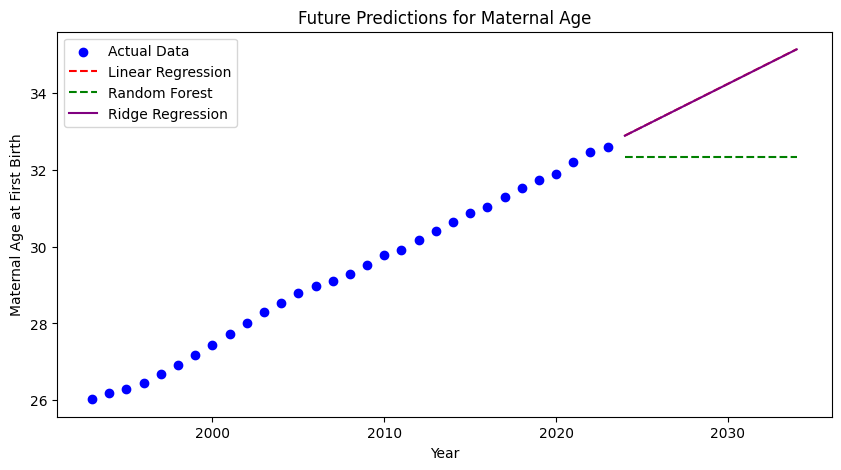

In [44]:
# Try Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.ravel().reshape(-1, 1), y_train.ravel())  # Flatten for RF compatibility
y_pred_rf = rf_model.predict(X_test.ravel().reshape(-1, 1))

# Ridge Regression (Regularization) with Cross-Validation
ridge_model = Ridge(alpha=1.0)
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Future Predictions for 2024-2034
future_years = np.array(range(2024, 2035)).reshape(-1, 1)
future_preds_lr = lr_model.predict(future_years)
future_preds_rf = rf_model.predict(future_years.ravel().reshape(-1, 1))
future_preds_ridge = ridge_model.predict(future_years)

# Evaluating Performance
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)

# Plot Predictions
plt.figure(figsize=(10, 5))
plt.scatter(years, maternal_age, color='blue', label='Actual Data')
plt.plot(future_years, future_preds_lr, 'r--', label='Linear Regression')
plt.plot(future_years, future_preds_rf, 'g--', label='Random Forest')
plt.plot(future_years, future_preds_ridge, 'purple', label='Ridge Regression')
plt.xlabel("Year")
plt.ylabel("Maternal Age at First Birth")
plt.title("Future Predictions for Maternal Age")
plt.legend()
plt.show()


### Analysis of performances of the 3 models

**1. Linear regression**

MAE: 0.0461 | MSE: 0.0032 had low error, meaning good fit.

My dataset is a set of steadily increasing maternal age over the years. A linear regression likely performed well because the trend actually follows a positively linear slope.

**2. Random Forest**

MAE: 0.1300 | MSE: 0.0231 had a much higher error than Linear Regression, meaning not a good fit at all.

The future predictions was a horizontal line. The Random Forest was overfitting to past data and was **not** able to extrapolate into the future predictions. In hindsight, this was not a good choice of model for predictions.

**3. Ridge Regression**

MAE: 0.0459 | MSE: 0.0032  was slightly better than Linear Regression.

This makes sense because ridge regression prevents extreme coefficient values, it likely smoothed out noise, which yielded slightly better generalization.

### Conclusion
The best model I can use is the ridge regression. It had the best error values, and even visually, it is clear that linear regression is the trend of the maternal age in the past 20+ years within the dataset.

Although the linear regression model fit the historical data very well, I believe it is wise to remember that the linear model will not fit forever, as maternal age cannot physiologically increase with no limitations. It would be interesting to see with future real data, of when the maternal age plateau, or possibly decreases, and what the social climate is like if and when that time comes.
